In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/CA_5-STATES_NETWORK_CLEAN_55_PERFEITO_SAVE_Block_Arduino_25_PERFECT_DOC_BREED_aligned_BEHAVIOR_work2_SIMILARITY_SEGREGATION_CENTROIDE_work experiment_centroid-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       '( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)',
       '( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y
0,1,1.5,1,10,0.05,0,2.631579,2.250000,0.095833,0.000000,0.398333,0.0750,0.000000,0.000000
1,3,1.5,1,10,0.15,0,2.808824,2.583333,0.000000,0.000000,0.304167,0.0125,0.000000,0.000000
2,5,1.5,1,20,0.05,0,2.763158,1.500000,0.037500,0.000000,0.262500,0.0000,0.000000,0.000000
3,7,1.5,1,30,0.05,0,2.184211,3.250000,0.075000,0.000000,0.343036,0.1875,0.000000,0.000000
4,2,1.5,1,10,0.05,0,2.723684,1.500000,0.037500,0.000000,0.316667,0.0125,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,105,5.5,5,30,0.15,86,2.191176,3.833333,0.736840,1.646203,0.616916,25.5250,-0.333897,-0.504456
9824,105,5.5,5,30,0.15,87,2.117647,4.333333,0.735542,1.643038,0.618225,25.4000,-0.146397,-0.616956
9825,105,5.5,5,30,0.15,88,2.220588,2.916667,0.736613,1.641139,0.619039,25.3250,-0.021397,-0.391956
9826,105,5.5,5,30,0.15,89,2.073529,4.083333,0.736220,1.639557,0.619701,25.2625,-0.246397,-0.529456


In [4]:
df_move=df4.groupby(['percentage-unhappy','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
percentage-unhappy step                                                         
10                 0         2.770382        2.283951      0.237801  0.000000   
                   1         1.975662        1.626543      0.297110  0.671613   
                   2         2.473111        2.064815      0.335912  0.785982   
                   3         2.341131        1.950617      0.353307  1.159060   
                   4         2.525771        2.003086      0.370498  1.023371   
...                               ...             ...           ...       ...   
40                 86        1.752007        5.645062      0.524916  0.849742   
                   87        1.626820        6.756173      0.524816  0.847480   
                   88        1.720875        3.459877      0.525301  0.845617   
                   89        1.500745        5.546296      0.525479  0.842065   
                   90        1.855492        5.722222      0.528202  0.840659   

                         closeness  betweenness  centroid-x  centroid-y  
percentage-unhappy step                                                  
10                 0      0.329401    59.296759    0.000000    0.000000  
                   1      0.303641    62.670370    0.283372    0.146122  
                   2      0.326154    67.899537    0.306670    0.135918  
                   3      0.312445    71.615278    0.312226    0.112770  
                   4      0.317658    67.906019    0.348417    0.098267  
...                            ...          ...         ...         ...  
40                 86     0.427916    49.024537    0.410846    0.182022  
                   87     0.430804    48.156481    0.395105    0.142207  
                   88     0.432126    47.809722    0.421957    0.090355  
                   89     0.432911    47.817593    0.425661    0.059337  
                   90     0.434563    47.574074    0.439550   -0.000386  

[364 rows x 8 columns]

In [5]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [6]:
df_move

mood_clients  mood_providers  cluster_coef     paths  \
percentage-unhappy step                                                         
10                 0         2.770382        2.283951      0.237801  0.000000   
                   1         1.975662        1.626543      0.297110  0.671613   
                   2         2.473111        2.064815      0.335912  0.785982   
                   3         2.341131        1.950617      0.353307  1.159060   
                   4         2.525771        2.003086      0.370498  1.023371   
...                               ...             ...           ...       ...   
40                 86        1.752007        5.645062      0.524916  0.849742   
                   87        1.626820        6.756173      0.524816  0.847480   
                   88        1.720875        3.459877      0.525301  0.845617   
                   89        1.500745        5.546296      0.525479  0.842065   
                   90        1.855492        5.722222      0.528202  0.840659   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0      0.329401    59.296759    0.000000    0.000000   
                   1      0.303641    62.670370    0.283372    0.146122   
                   2      0.326154    67.899537    0.306670    0.135918   
                   3      0.312445    71.615278    0.312226    0.112770   
                   4      0.317658    67.906019    0.348417    0.098267   
...                            ...          ...         ...         ...   
40                 86     0.427916    49.024537    0.410846    0.182022   
                   87     0.430804    48.156481    0.395105    0.142207   
                   88     0.432126    47.809722    0.421957    0.090355   
                   89     0.432911    47.817593    0.425661    0.059337   
                   90     0.434563    47.574074    0.439550   -0.000386   

                         total_mood  
percentage-unhappy step              
10                 0       5.054332  
                   1       3.602205  
                   2       4.537926  
                   3       4.291748  
                   4       4.528858  
...                             ...  
40                 86      7.397068  
                   87      8.382993  
                   88      5.180751  
                   89      7.047042  
                   90      7.577715  

[364 rows x 9 columns]

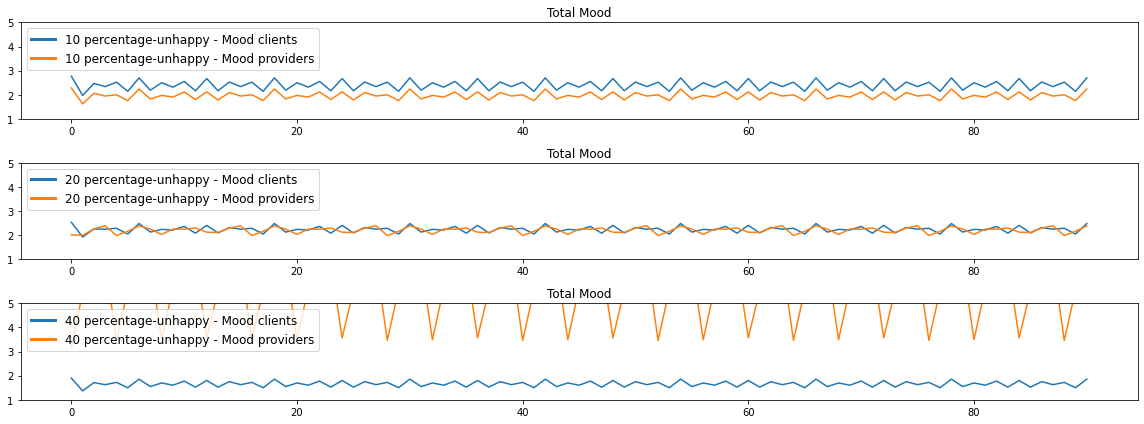

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_clients'], label='{} percentage-unhappy - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['mood_providers'], label='{} percentage-unhappy - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



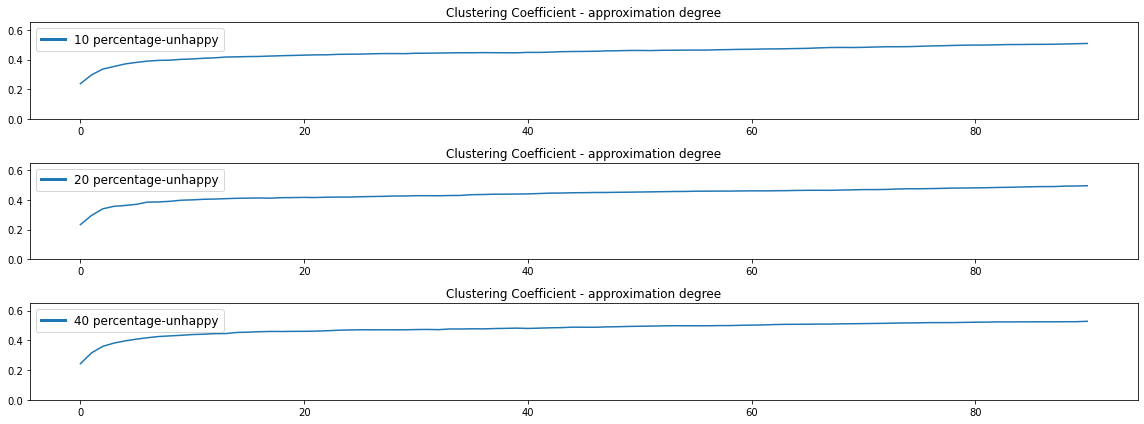

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['cluster_coef'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



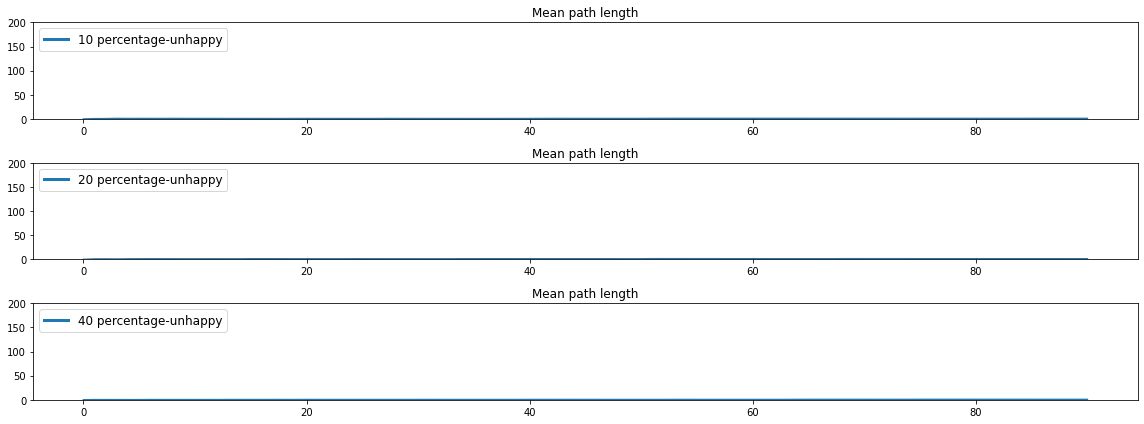

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['paths'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



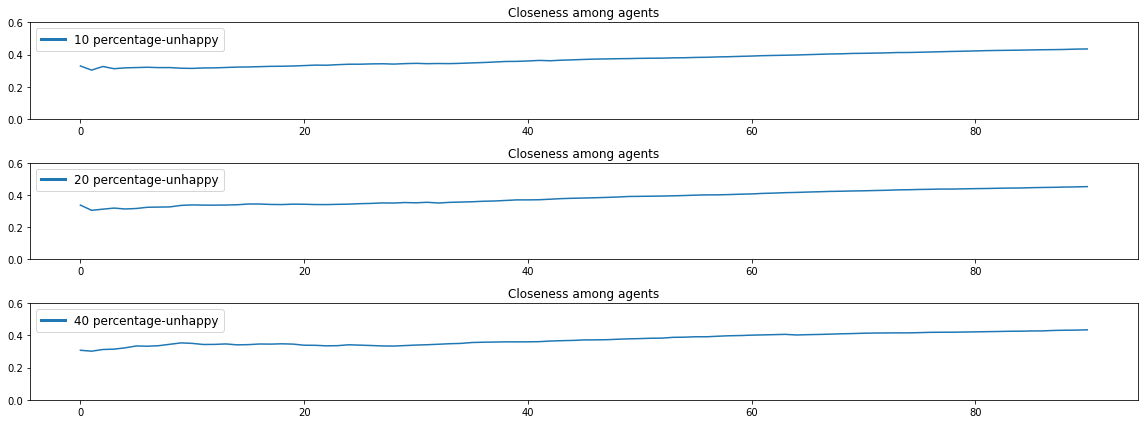

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['closeness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



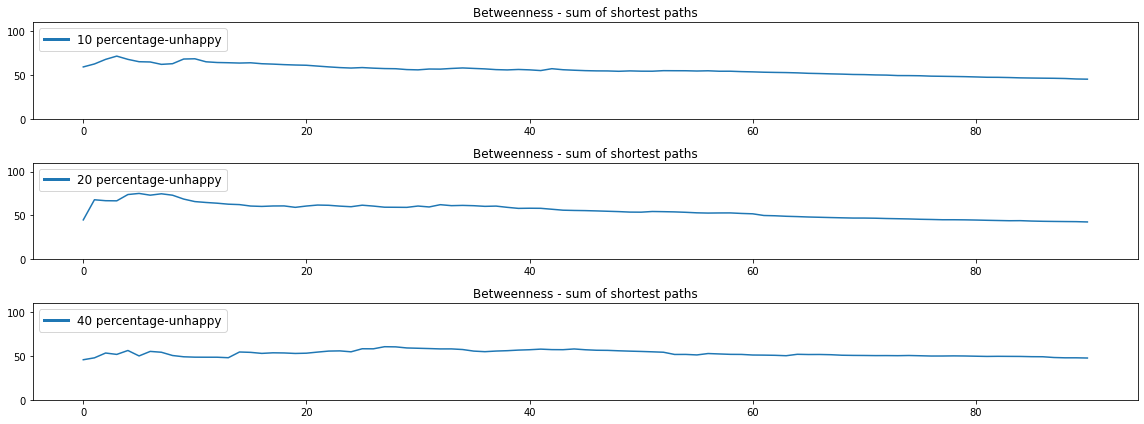

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [10,20,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==i]['betweenness'], label='{} percentage-unhappy'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [12]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==5].mean()

In [13]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [14]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,29.8047,0.0
1,mood_providers,-27.2023,0.0
2,cluster_coef,-4.5074,0.0
3,paths,17.4447,0.0
4,closeness,-0.9699,0.3334
5,betweenness,3.9694,0.0001
6,centroid-x,4.3072,0.0
7,centroid-y,-16.0751,0.0
8,total_mood,-21.3085,0.0


In [15]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,888.3204,0.0
1,mood_providers,739.9645,0.0
2,cluster_coef,20.3164,0.0
3,paths,304.319,0.0
4,closeness,0.9408,0.3334
5,betweenness,15.7558,0.0001
6,centroid-x,18.5523,0.0
7,centroid-y,258.4076,0.0
8,total_mood,454.0515,0.0


In [16]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients     -0.6716
mood_providers   -0.5372
cluster_coef      0.7637
paths             0.3541
closeness         0.9518
betweenness       0.8671
total_mood       -0.6213
centroid-x       -0.2948
centroid-y        0.3039
dtype: float64

In [17]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6624
mood_providers   -0.4342
cluster_coef      0.7970
paths             0.8036
closeness         0.7845
betweenness      -0.6125
total_mood       -0.3487
centroid-x       -0.0714
centroid-y       -0.2436
dtype: float64

In [18]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1.5].iloc[0:30,2:].shape

(0, 9)

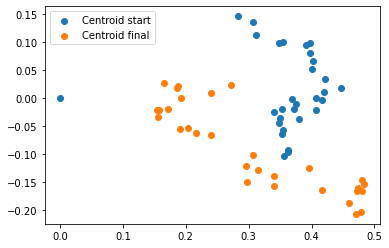

In [19]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

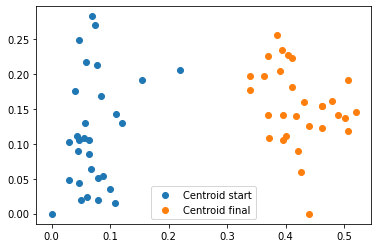

In [20]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [21]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
percentage-unhappy step                                                       
10                 0           2.7704          2.2840        0.2378  0.0000   
                   1           1.9757          1.6265        0.2971  0.6716   
                   2           2.4731          2.0648        0.3359  0.7860   
                   3           2.3411          1.9506        0.3533  1.1591   
                   4           2.5258          2.0031        0.3705  1.0234   
...                               ...             ...           ...     ...   
40                 86          1.7520          5.6451        0.5249  0.8497   
                   87          1.6268          6.7562        0.5248  0.8475   
                   88          1.7209          3.4599        0.5253  0.8456   
                   89          1.5007          5.5463        0.5255  0.8421   
                   90          1.8555          5.7222        0.5282  0.8407   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0        0.3294      59.2968      0.0000      0.0000   
                   1        0.3036      62.6704      0.2834      0.1461   
                   2        0.3262      67.8995      0.3067      0.1359   
                   3        0.3124      71.6153      0.3122      0.1128   
                   4        0.3177      67.9060      0.3484      0.0983   
...                            ...          ...         ...         ...   
40                 86       0.4279      49.0245      0.4108      0.1820   
                   87       0.4308      48.1565      0.3951      0.1422   
                   88       0.4321      47.8097      0.4220      0.0904   
                   89       0.4329      47.8176      0.4257      0.0593   
                   90       0.4346      47.5741      0.4395     -0.0004   

                         total_mood  
percentage-unhappy step              
10                 0         5.0543  
                   1         3.6022  
                   2         4.5379  
                   3         4.2917  
                   4         4.5289  
...                             ...  
40                 86        7.3971  
                   87        8.3830  
                   88        5.1808  
                   89        7.0470  
                   90        7.5777  

[364 rows x 9 columns]

/tmp/ipykernel_250824/2319704261.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


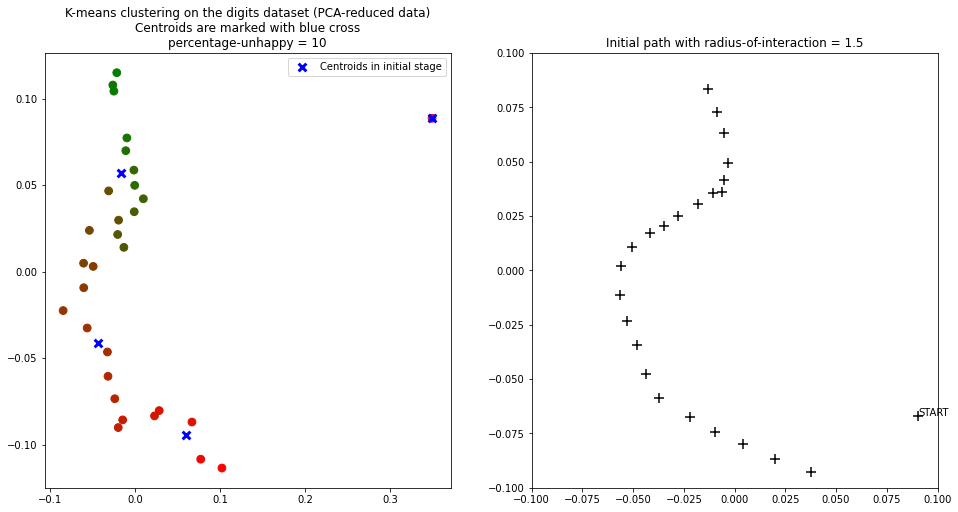

In [22]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.show()

In [23]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1].shape

(0, 11)

/tmp/ipykernel_250824/2137483720.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


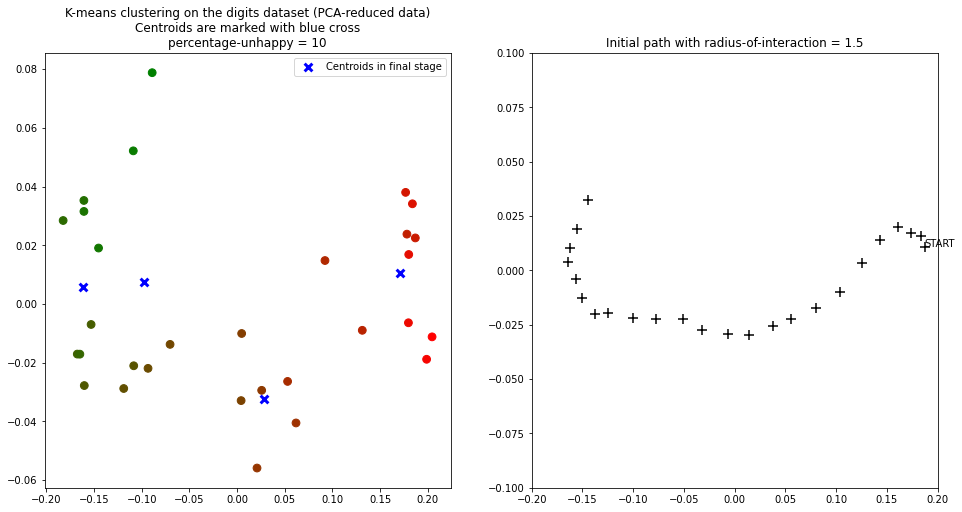

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)

plt.show()

/tmp/ipykernel_250824/3553537789.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


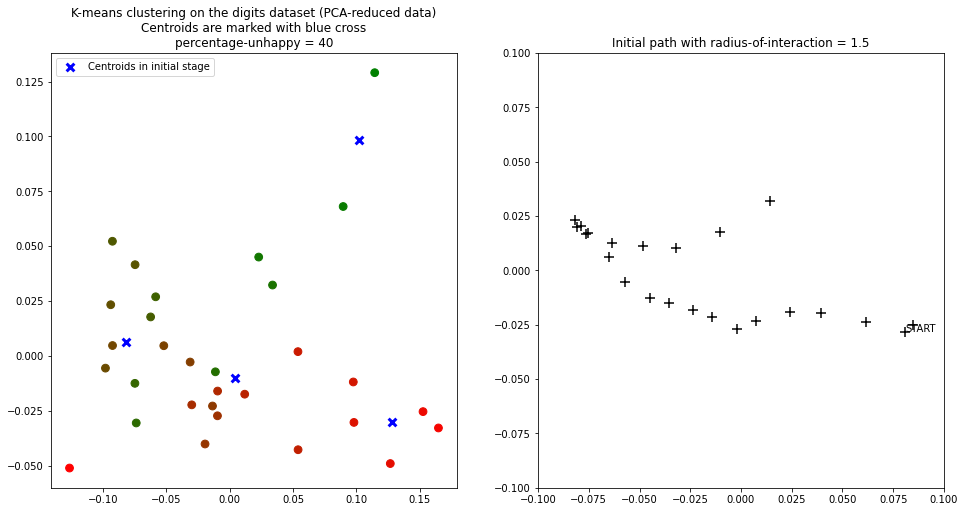

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.show()

/tmp/ipykernel_250824/106187077.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


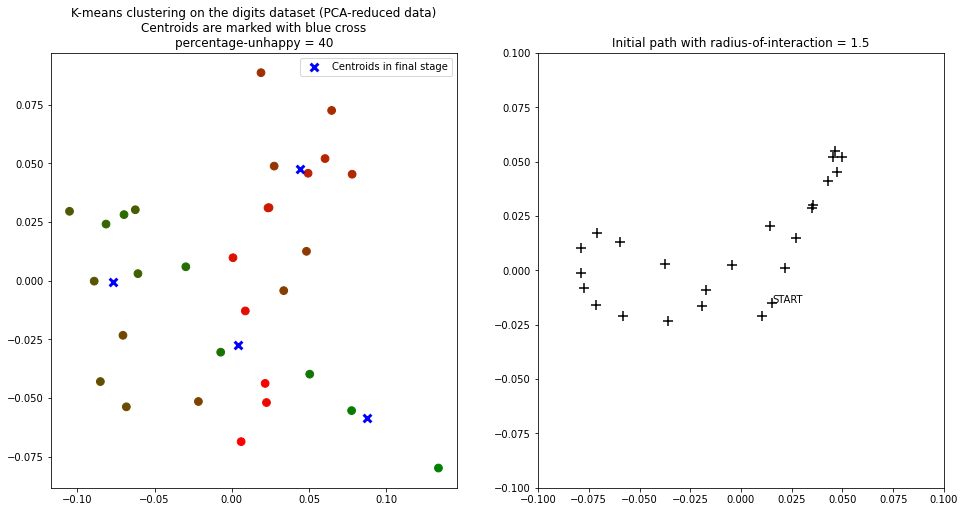

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 40"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.show()